# Evaluation

### Final cross validation scores
- 0.97 accuracy with a standard deviation of 0.00

This is a very high accuracy with a very low deviation. Is this really true?

In [1]:
import pickle as rick
from sklearn import svm

In [3]:
# Read in the model
with open('model/svc.model', 'rb') as f:
    clf = rick.load(f)

In [4]:
# Import dataset 'X'
with open('X.pickle', 'rb') as f:
    X = rick.load(f)

# Import dataset 'y'
with open('y.pickle', 'rb') as f:
    y = rick.load(f)

In [7]:
# Get prediction y
y_pred = clf.predict(X)

# Show top-10
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Visualize with PCA

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [27]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [28]:
# Create PCA dot plot
X_reduced = PCA(n_components=2).fit_transform(X)

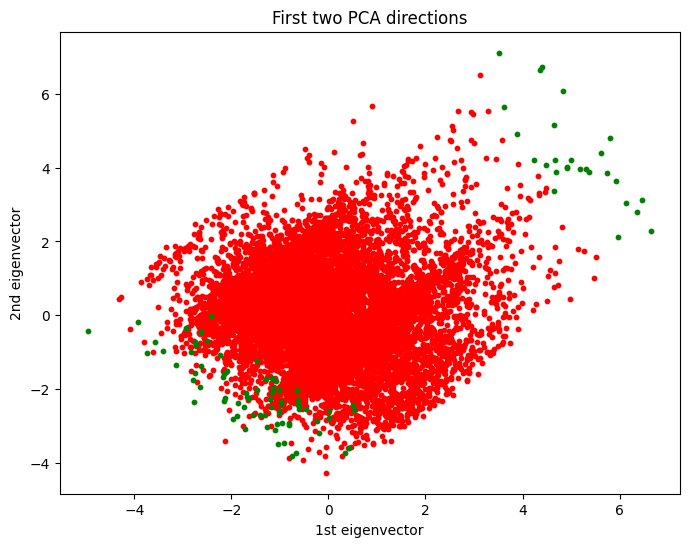

In [29]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

for c, i in zip("rg", [0, 1]):
    ax.scatter(X_reduced[y_pred == i, 0], X_reduced[y_pred == i, 1], c=c, s=10)

ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
plt.show()

#### Visualize with t-SNE

In [26]:
from sklearn.manifold import TSNE

In [30]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)

X_embedded = tsne.fit_transform(X)

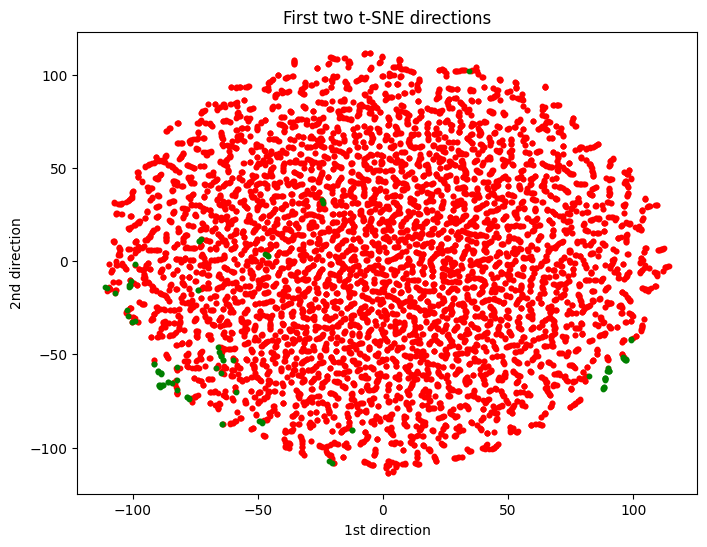

In [31]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

for c, i in zip("rg", [0, 1]):
    ax.scatter(X_embedded[y_pred == i, 0], X_embedded[y_pred == i, 1], c=c, s=10)

ax.set_title("First two t-SNE directions")
ax.set_xlabel("1st direction")
ax.set_ylabel("2nd direction")
plt.show()